In [1]:
import pandas as pd 
import numpy as np
import swifter
import time

### 普通的apply

In [99]:
%%time
numarray = np.linspace(0,10000000,41)
timecost = []
iterate_time = []
for iterate,num in enumerate(numarray):
    start = time.time()
    original_df = np.random.randint(-100,100,int(num))
    dataframe = pd.DataFrame(original_df.reshape(int(num/10),10))
    dataframe[8].apply(lambda x:np.log(x) if x > 0 else 0)
    end = time.time()
    totaltime = end-start
    timecost.append(totaltime)
    iterate_time.append(num)




CPU times: user 27.2 s, sys: 1.73 s, total: 28.9 s
Wall time: 29.5 s


### 呼叫多個CPU幫忙的apply

In [100]:
%%time
numarray = np.linspace(0,10000000,41)
timecost_2 = []
iterate_time_2 = []
for iterate,num in enumerate(numarray):
    start = time.time()
    original_df = np.random.randint(-100,100,int(num))
    dataframe = pd.DataFrame(original_df.reshape(int(num/10),10))
    dataframe[8].swifter.apply(lambda x:np.log(x) if x > 0 else 0)
    end = time.time()
    totaltime = end-start
    timecost_2.append(totaltime)
    iterate_time_2.append(num)



/Users/liaoshousan/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


/Users/liaoshousan/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel



CPU times: user 30.1 s, sys: 4.14 s, total: 34.2 s
Wall time: 48.1 s


### 將兩者所花費的時間畫圖比較

Text(0.5, 1.0, 'speed compare swifter.apply vs pandas.apply')

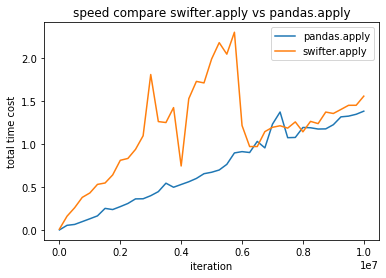

In [101]:
import matplotlib.pyplot as plt

plt.plot(iterate_time,timecost)
plt.plot(iterate_time_2,timecost_2)

plt.legend(('pandas.apply', 'swifter.apply'), loc='upper right')  
plt.xlabel('iteration')
plt.ylabel('total time cost')
plt.title('speed compare swifter.apply vs pandas.apply')

結果加速並沒有比較好r!!!

不然公平起見，試試看先跑加速的

In [105]:
%%time
numarray = np.linspace(0,100000000,41)
timecost_2 = []
iterate_time_2 = []
for iterate,num in enumerate(numarray):
    start = time.time()
    original_df = np.random.randint(-100,100,int(num))
    dataframe = pd.DataFrame(original_df.reshape(int(num/10),10))
    dataframe[8].swifter.apply(lambda x:np.log(x) if x > 0 else 0)
    end = time.time()
    totaltime = end-start
    timecost_2.append(totaltime)
    iterate_time_2.append(num)



/Users/liaoshousan/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


OSError: [Errno 24] Too many open files

In [106]:
%%time
numarray = np.linspace(0,100000000,41)
timecost = []
iterate_time = []
for iterate,num in enumerate(numarray):
    start = time.time()
    original_df = np.random.randint(-100,100,int(num))
    dataframe = pd.DataFrame(original_df.reshape(int(num/10),10))
    dataframe[8].apply(lambda x:np.log(x) if x > 0 else 0)
    end = time.time()
    totaltime = end-start
    timecost.append(totaltime)
    iterate_time.append(num)




CPU times: user 4min 29s, sys: 18.9 s, total: 4min 48s
Wall time: 4min 53s


Text(0.5, 1.0, 'speed compare swifter.apply vs pandas.apply')

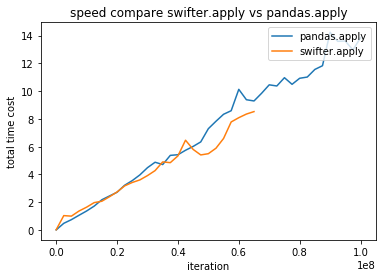

In [107]:
import matplotlib.pyplot as plt

plt.plot(iterate_time,timecost)
plt.plot(iterate_time_2,timecost_2)

plt.legend(('pandas.apply', 'swifter.apply'), loc='upper right')  
plt.xlabel('iteration')
plt.ylabel('total time cost')
plt.title('speed compare swifter.apply vs pandas.apply')

swifter後面就跑不出來了，不過大致可以猜出，如果資料筆數較大，可以用swifter